In [22]:
import cv2
import numpy as np
import pickle
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from IPython import display
import time

In [4]:
not_found = pickle.load( open( "../data/not_found.p", "rb" ) )

In [7]:
mtcnn = MTCNN(image_size=(218,178), margin=0)

In [9]:
not_found_by_both = []

In [18]:
frames_tracked = []
confs = []
for i, pic_path in enumerate(not_found):
    if i == 100 :
        break
    print('\rTracking frame: {}'.format(i + 1), end='')
    pic = Image.open(pic_path)
    # Detect faces
    boxes, conf = mtcnn.detect(pic)
    
    # Draw faces
    frame_draw = pic.copy()
    draw = ImageDraw.Draw(frame_draw)
    if boxes is not None:
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    else:
        not_found_by_both.append(pic_path)
    
    # Add to frame list
    frames_tracked.append(frame_draw.resize((218, 178), Image.BILINEAR))
    confs.append(conf)
print('\nDone')


Tracking frame: 100
Done


In [19]:
len(not_found_by_both)

6

In [20]:
len(not_found)

5609

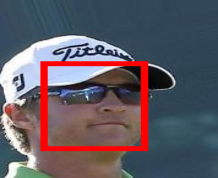

array([0.9999754428863525], dtype=object)

In [23]:



for i,frame in enumerate(frames_tracked):
    display.display(frame)
    display.display(confs[i])
    time.sleep(1)
    display.clear_output(wait=True)
    